In [48]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Data Analysis Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Turns off warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
#load the data 
data_df = pd.read_csv('breast-cancer.csv')
data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
#look for any missing values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [51]:
data_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


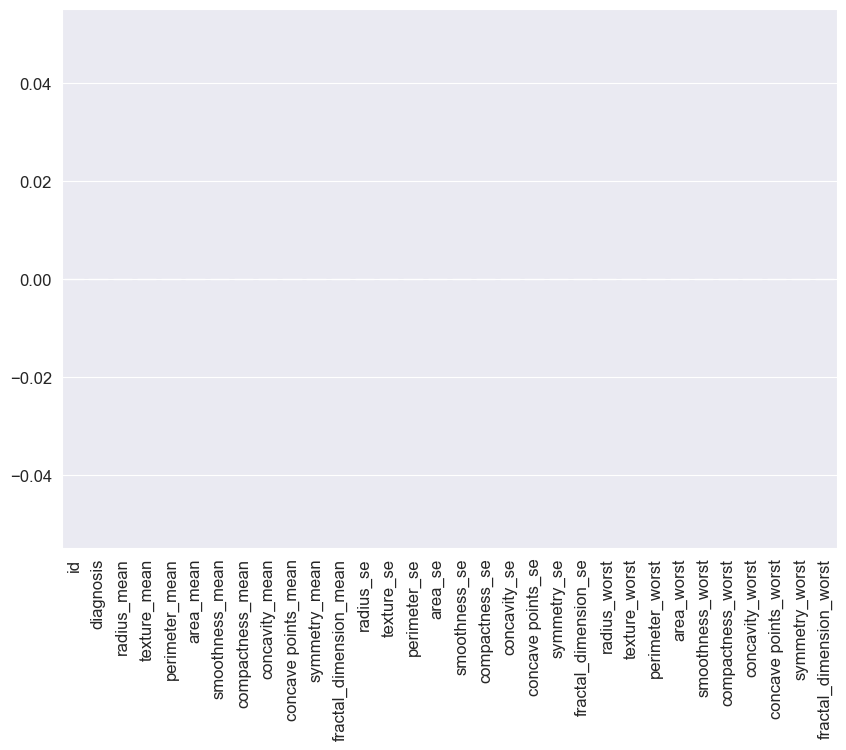

In [52]:
#barplot to visualize for any missing data 
sns.barplot(x = data_df.columns, y = data_df.isnull().sum().values)
plt.xticks(rotation = 90)
plt.show()

In [53]:
data_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

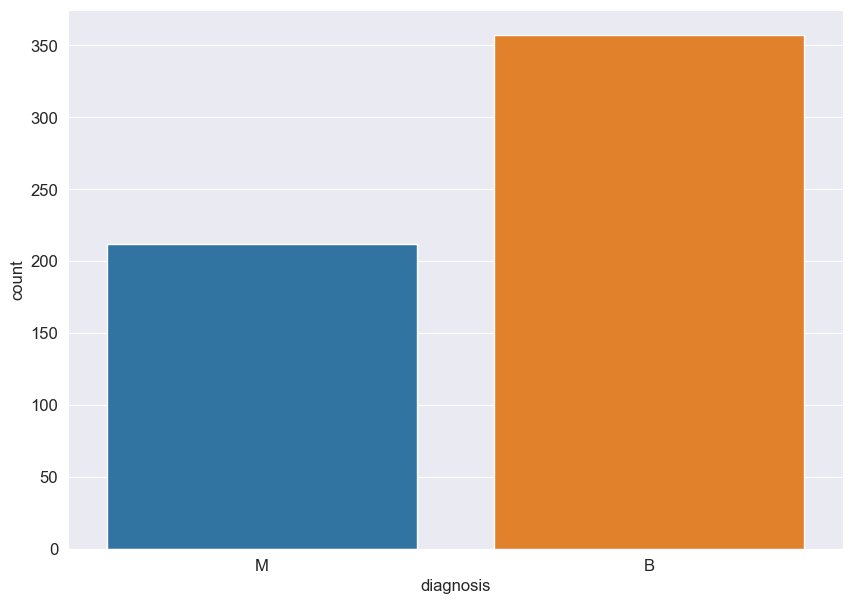

In [54]:
#countplot to visualize the target varaible 'diagnosis'
sns.countplot(x=data_df['diagnosis'])

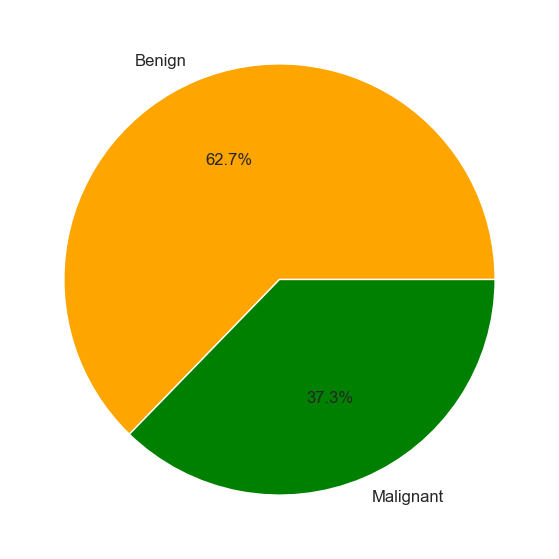

In [55]:
#piechart to see the percentage of each diagnosis type
pie_labels = ['Benign', 'Malignant']
pie_colors = ['Orange', 'Green']
plt.pie(data_df['diagnosis'].value_counts(),autopct='%1.1f%%', labels=pie_labels, colors= pie_colors)
plt.show()

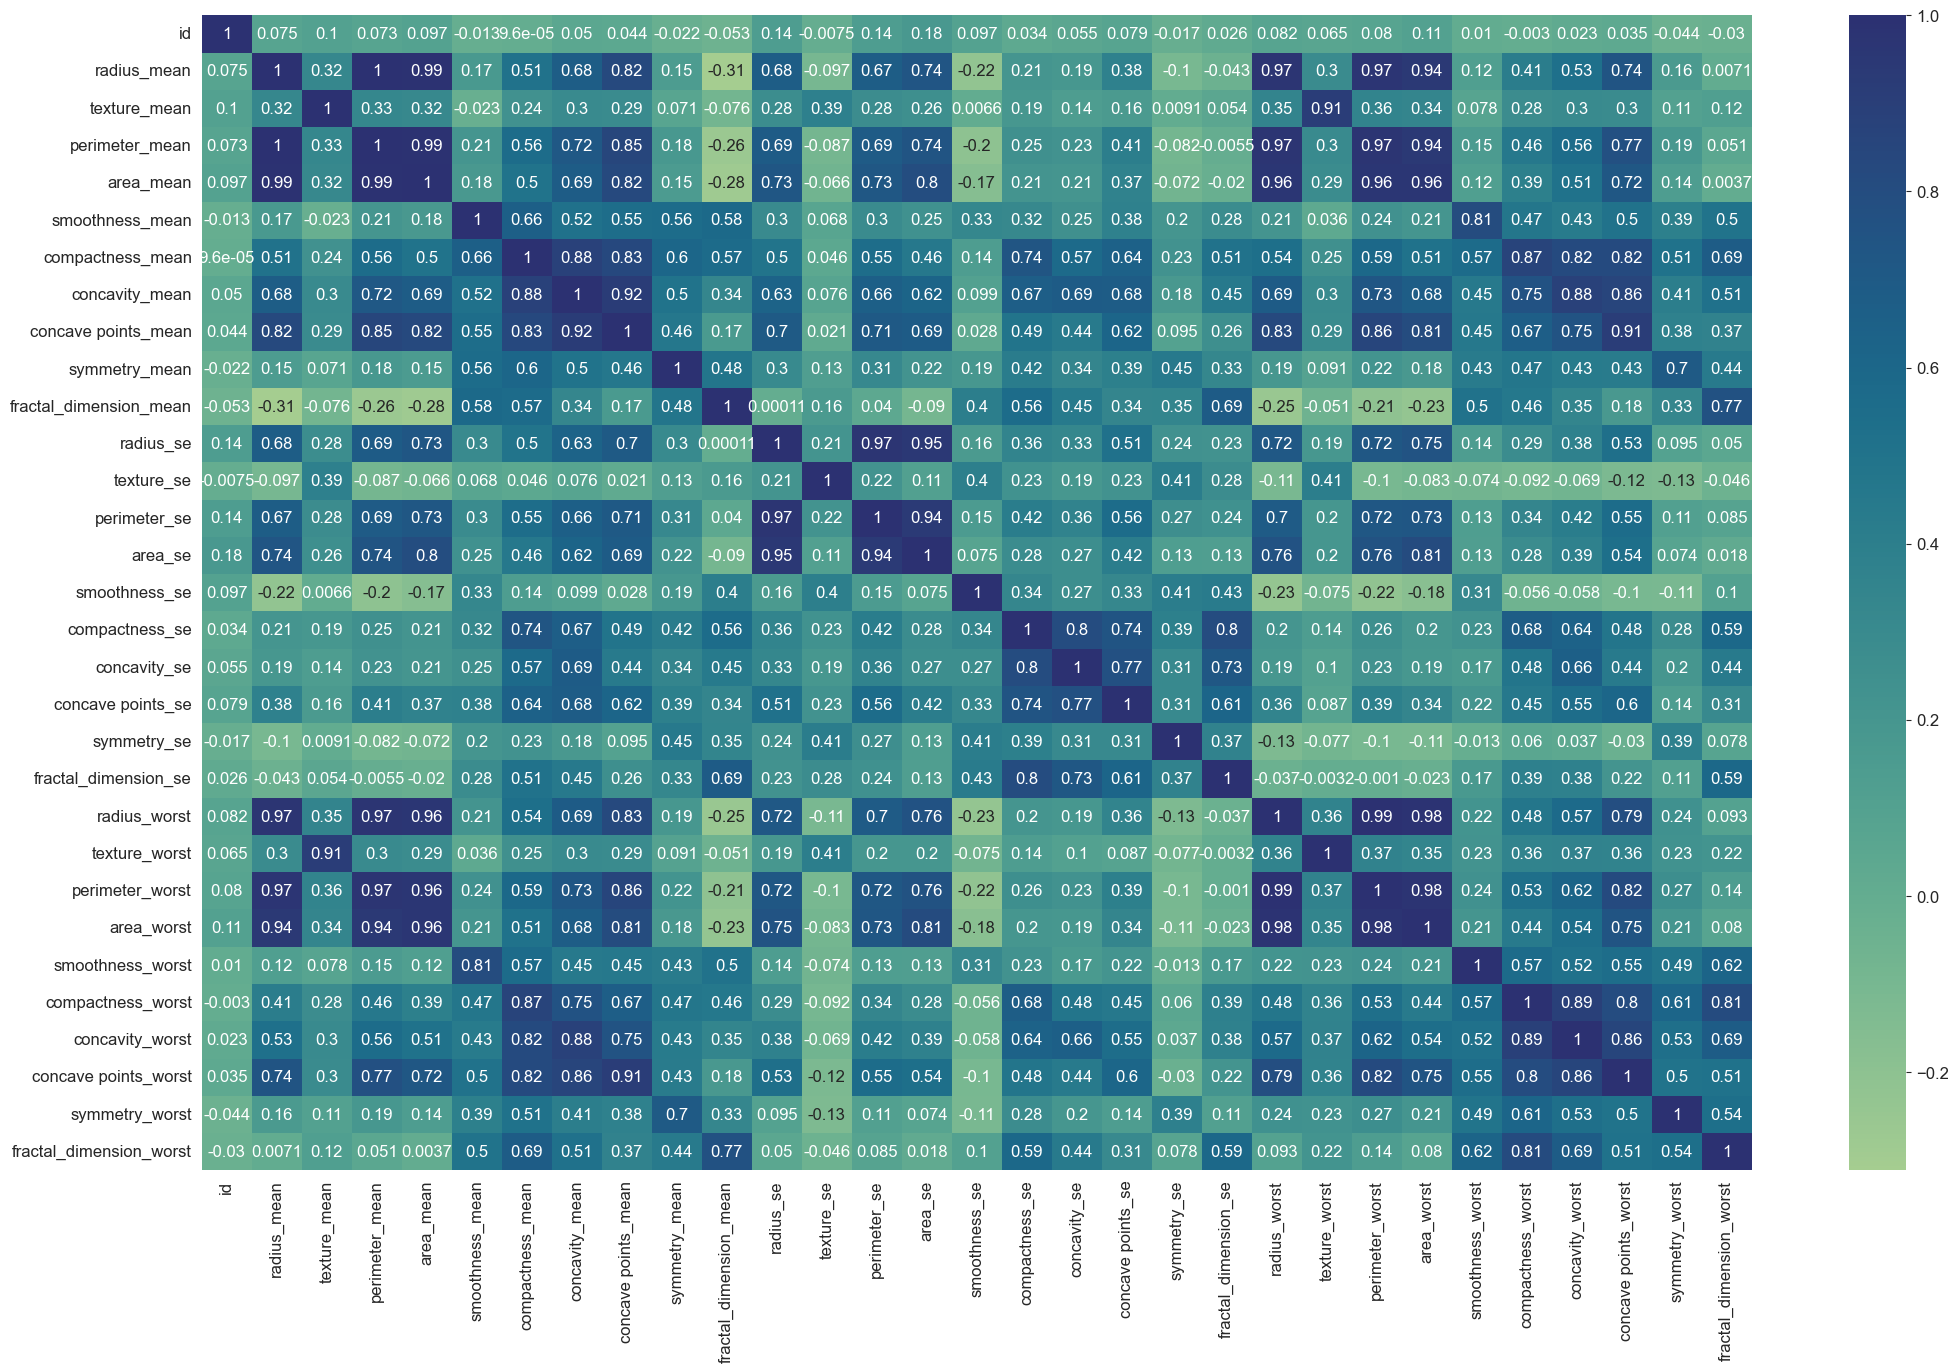

In [56]:
#heatmap to visualize multicollinearity
plt.figure(figsize=(25,15)) 
sns.heatmap(data_df.corr(), annot=True, cmap = 'crest')
plt.show()

<AxesSubplot:xlabel='area_mean', ylabel='Count'>

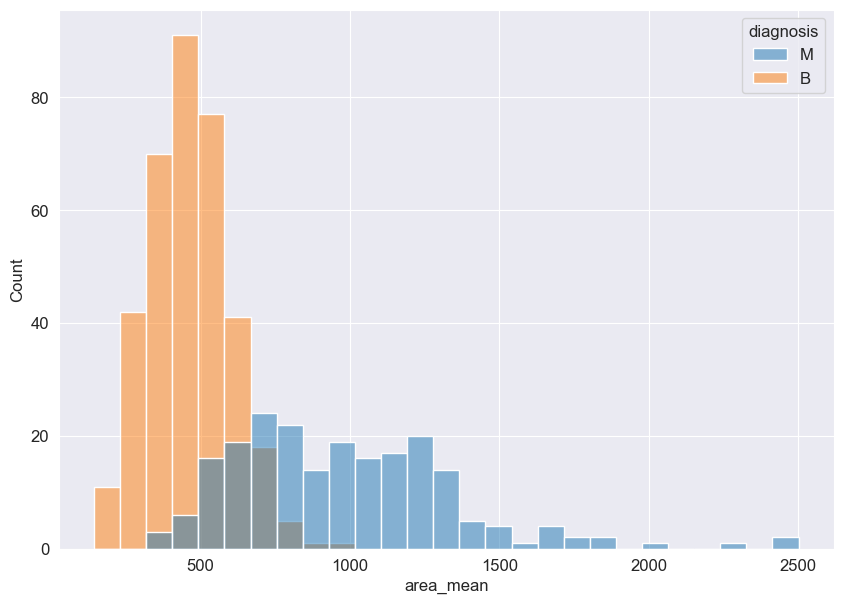

In [57]:
#histplot for area_mean and diganosis 
sns.histplot(data=data_df, x='area_mean', hue='diagnosis')

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

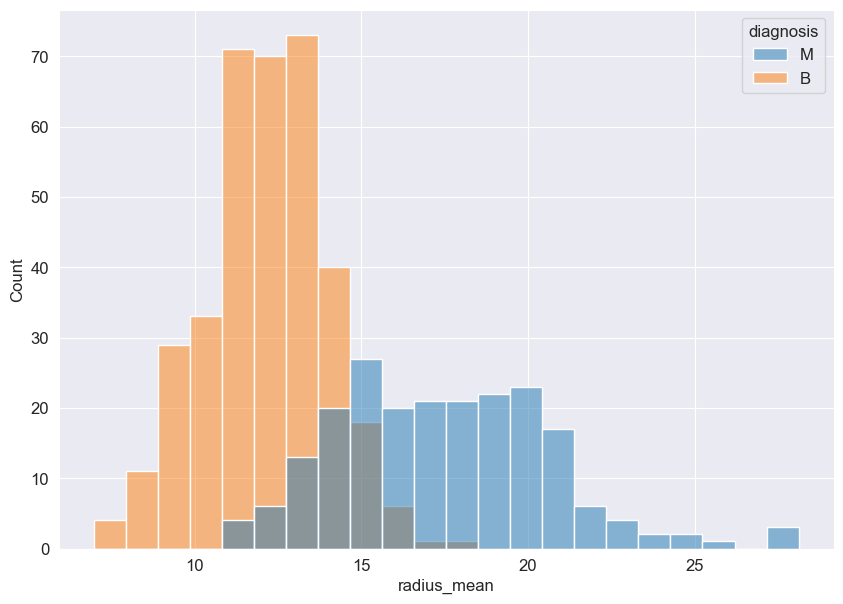

In [58]:
#histplot for radius_mean and diganosis 
sns.histplot(data=data_df, x='radius_mean', hue='diagnosis')

<AxesSubplot:xlabel='perimeter_mean', ylabel='Count'>

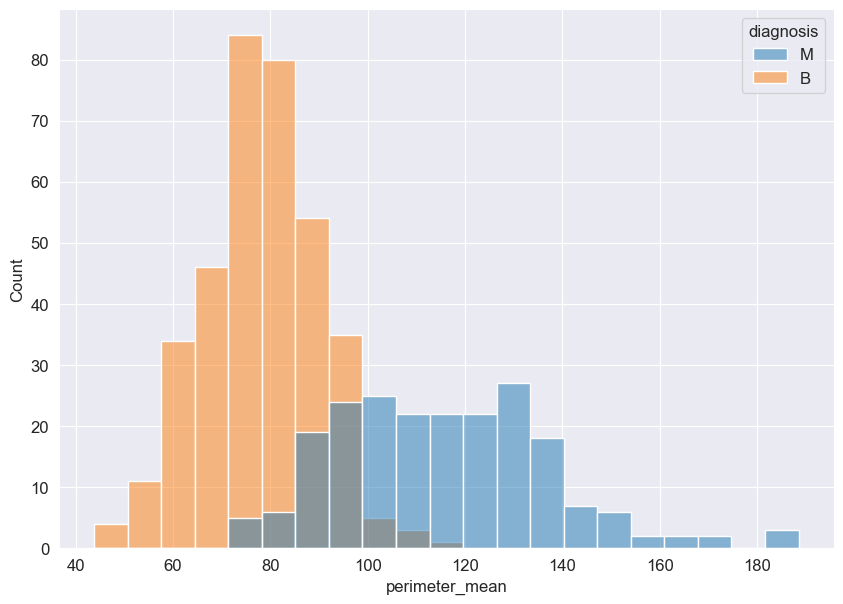

In [59]:
#histplot for perimeter_mean and diganosis 
sns.histplot(data=data_df, x='perimeter_mean', hue='diagnosis')

<AxesSubplot:xlabel='radius_se', ylabel='Count'>

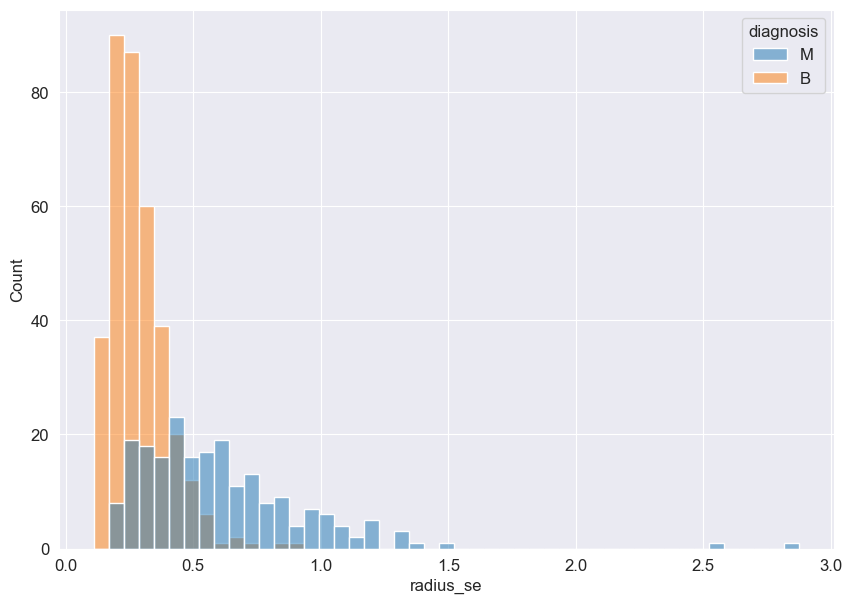

In [60]:
#histplot for radius_se and diganosis 
sns.histplot(data=data_df, x='radius_se', hue='diagnosis')

<AxesSubplot:xlabel='texture_mean', ylabel='Count'>

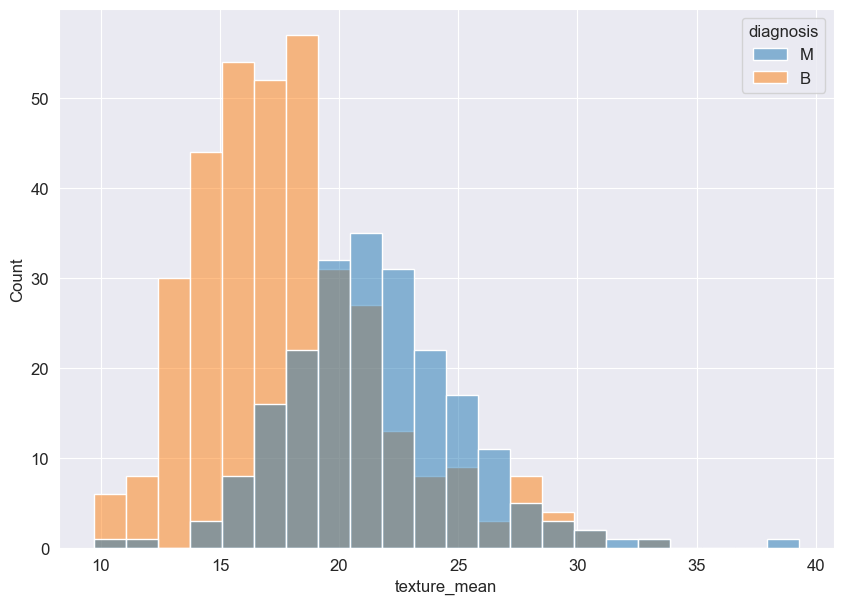

In [61]:
#histplot for texture_mean and diganosis 
sns.histplot(data=data_df, x='texture_mean', hue='diagnosis')

<AxesSubplot:xlabel='compactness_worst', ylabel='Count'>

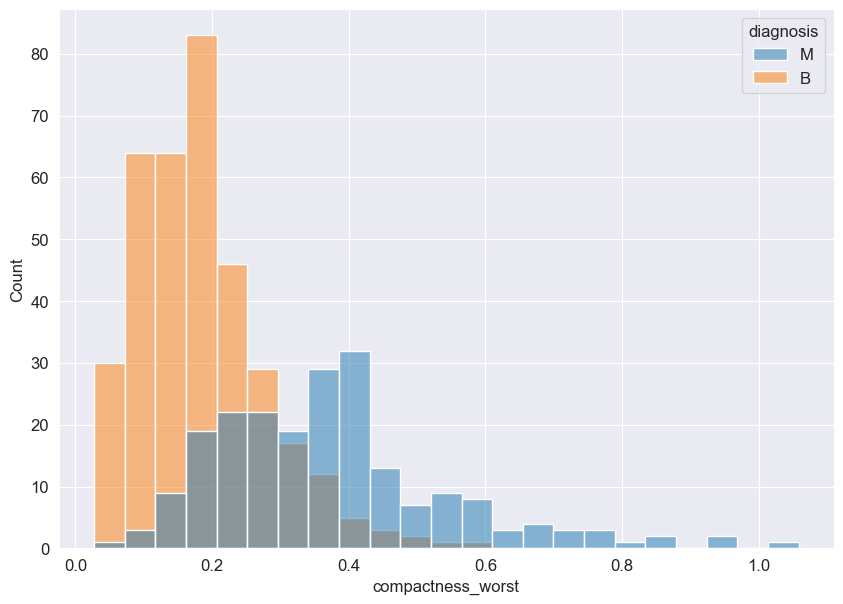

In [62]:
#histplot for compactness_worst and diganosis 
sns.histplot(data=data_df, x='compactness_worst', hue='diagnosis')

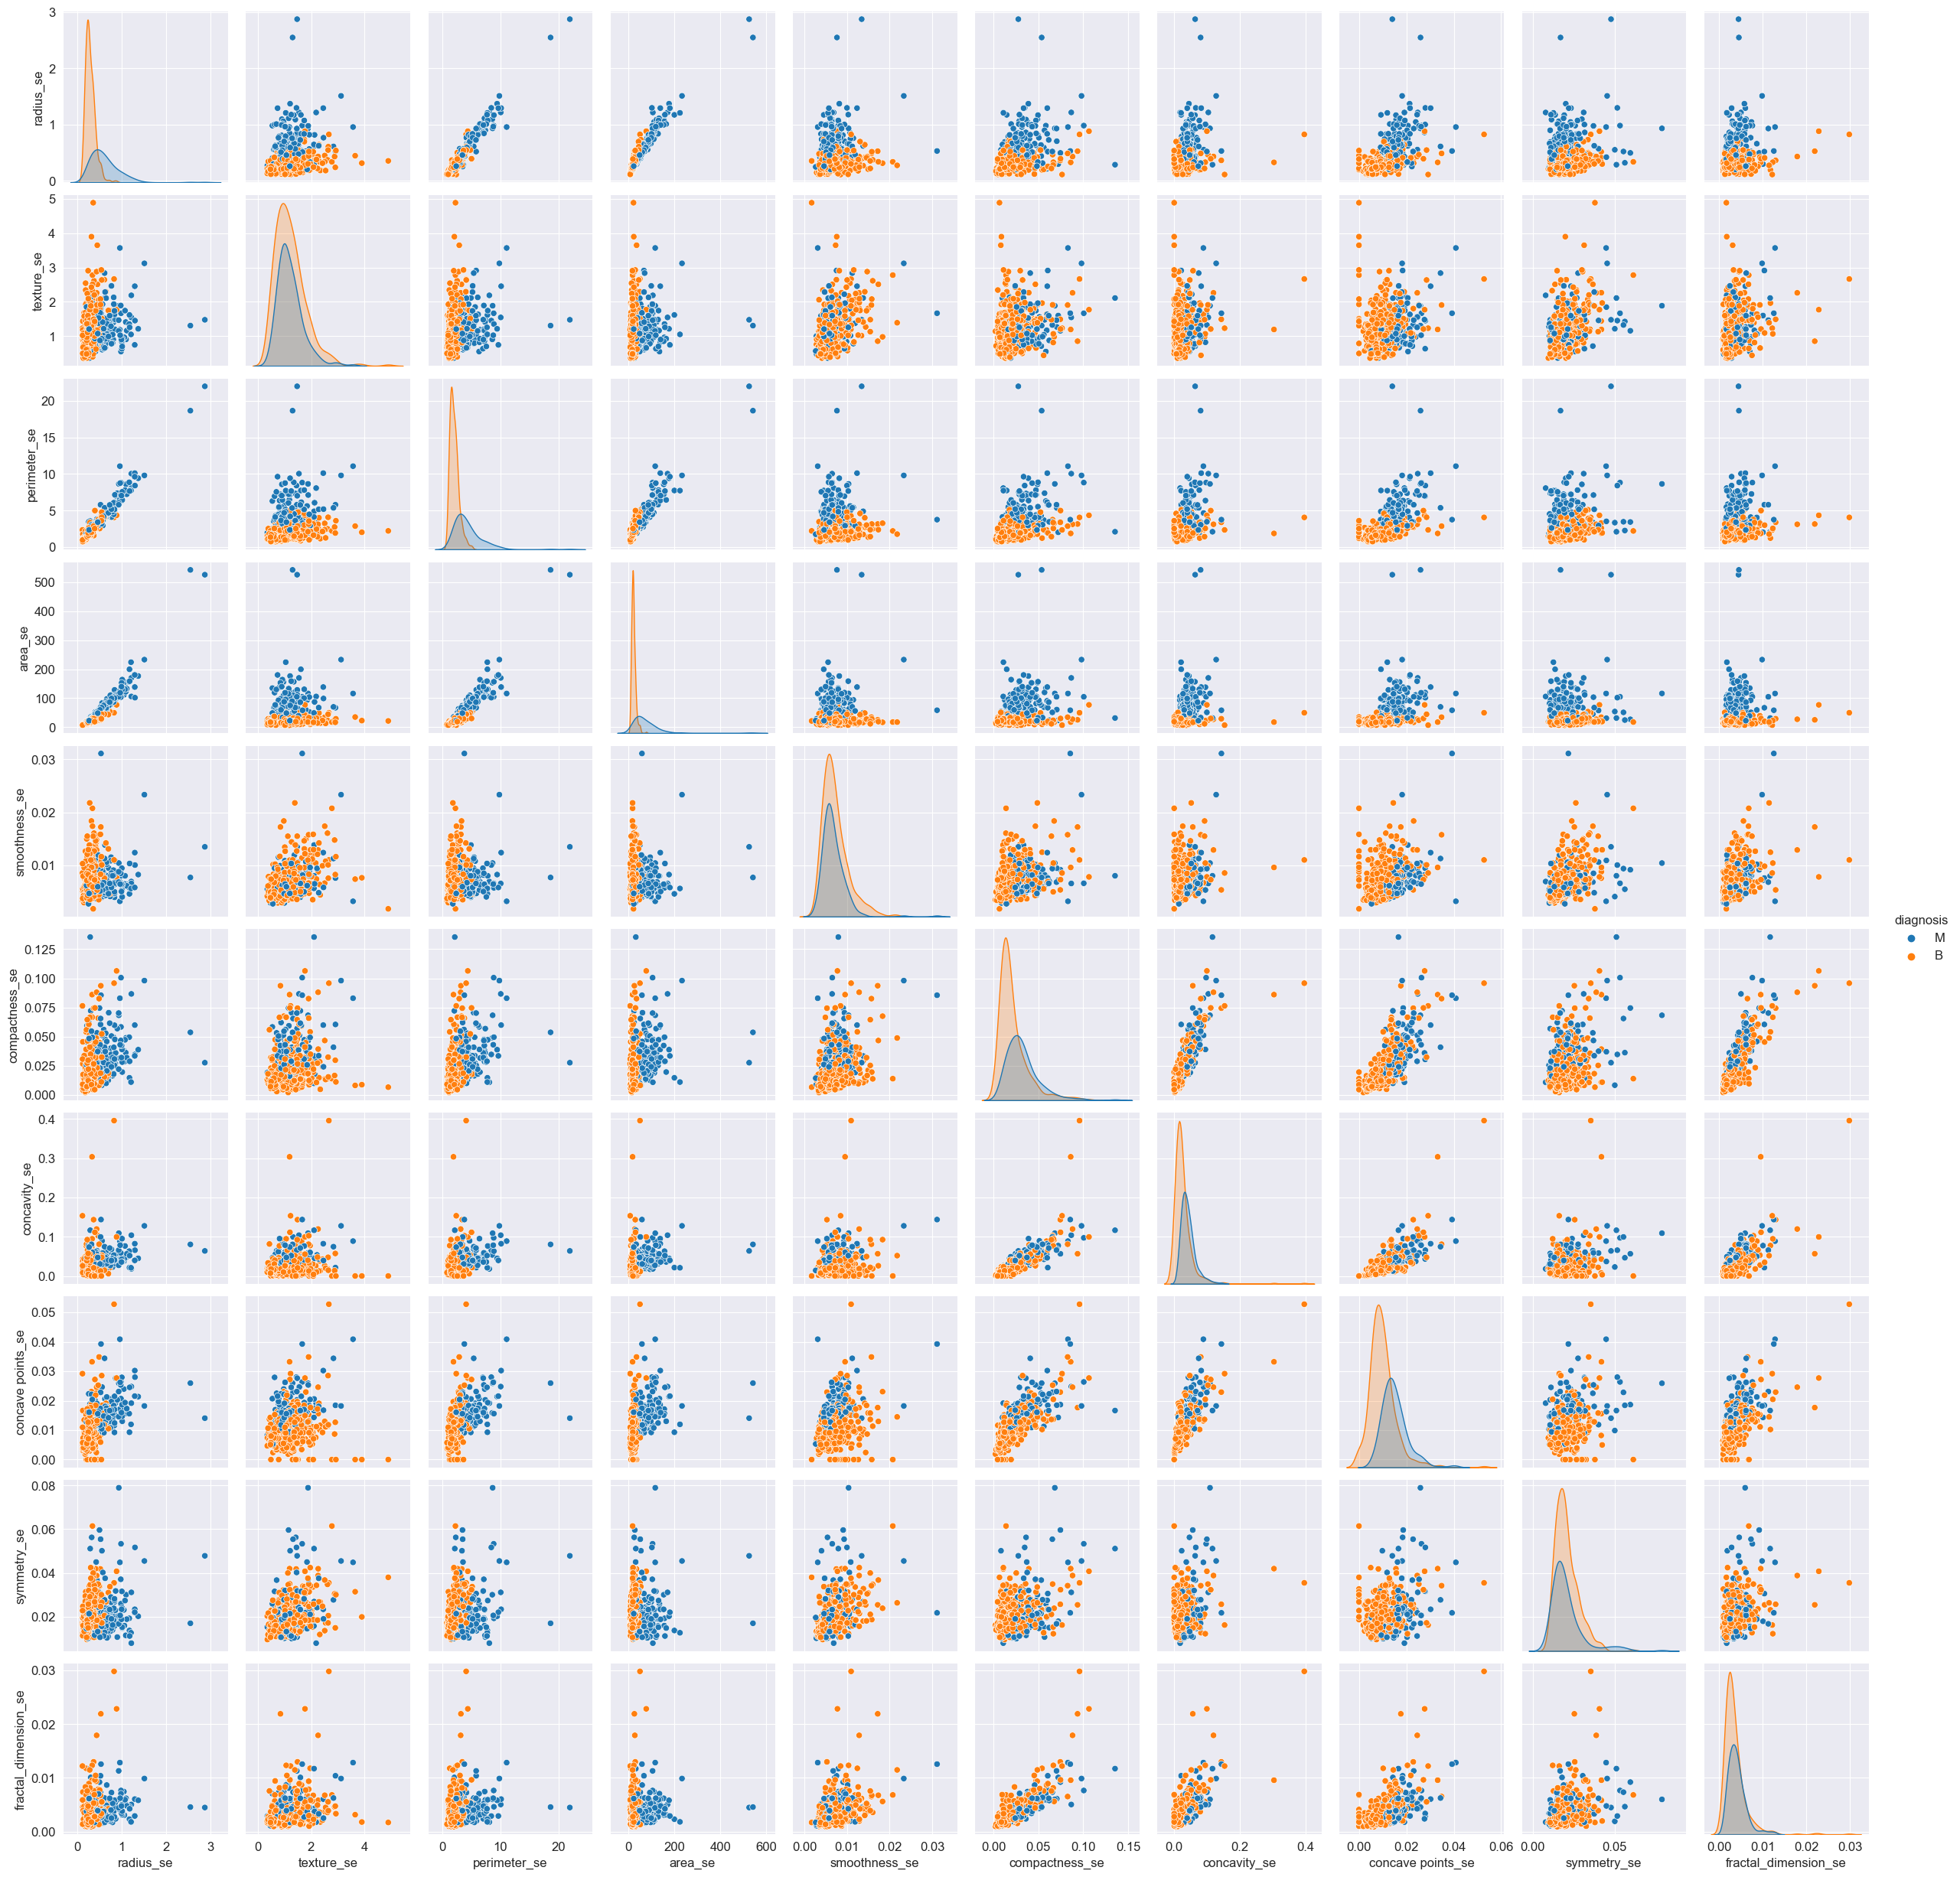

In [63]:
#pairplot to visualize relationship between following mentioned variables
sns.pairplot(data_df, hue='diagnosis', vars=['radius_se', 'texture_se', 'perimeter_se', 'area_se', 
                                     'smoothness_se', 'compactness_se', 'concavity_se',
                                     'concave points_se', 'symmetry_se', 'fractal_dimension_se'])
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

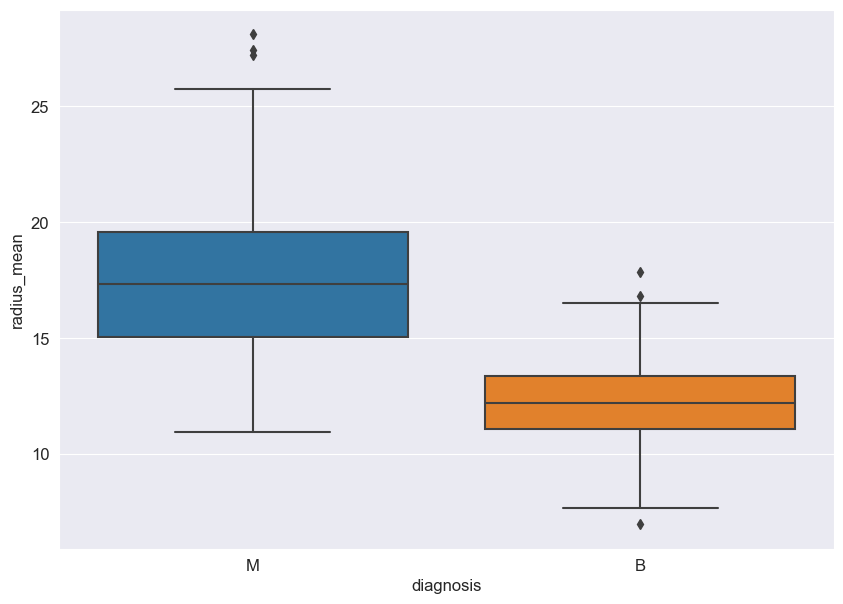

In [64]:
#boxplot for diagnosis and radius_mean 
sns.boxplot(x=data_df['diagnosis'], y = data_df['radius_mean'])

<AxesSubplot:xlabel='diagnosis', ylabel='texture_worst'>

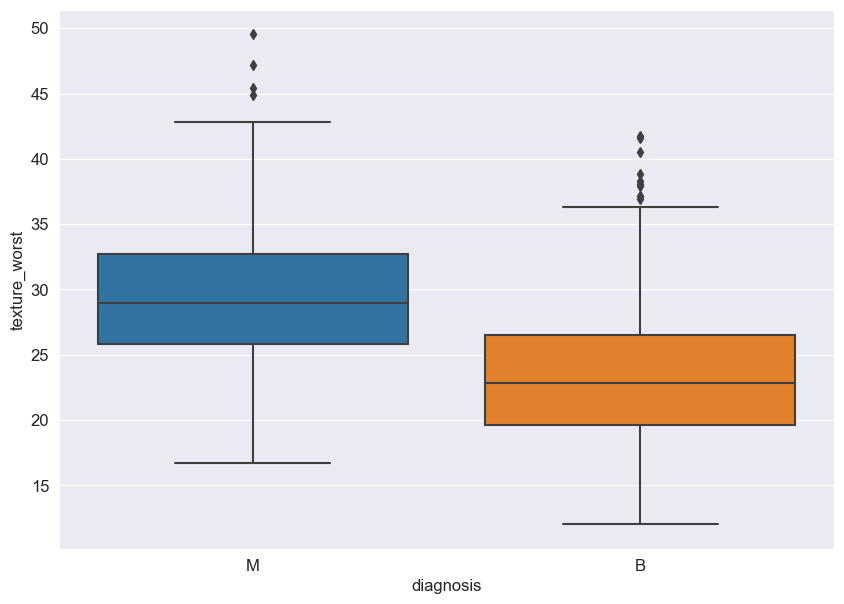

In [65]:
#boxplot for diagnosis and texture_worst
sns.boxplot(x=data_df['diagnosis'], y = data_df['texture_worst'])

<AxesSubplot:xlabel='texture_mean', ylabel='smoothness_mean'>

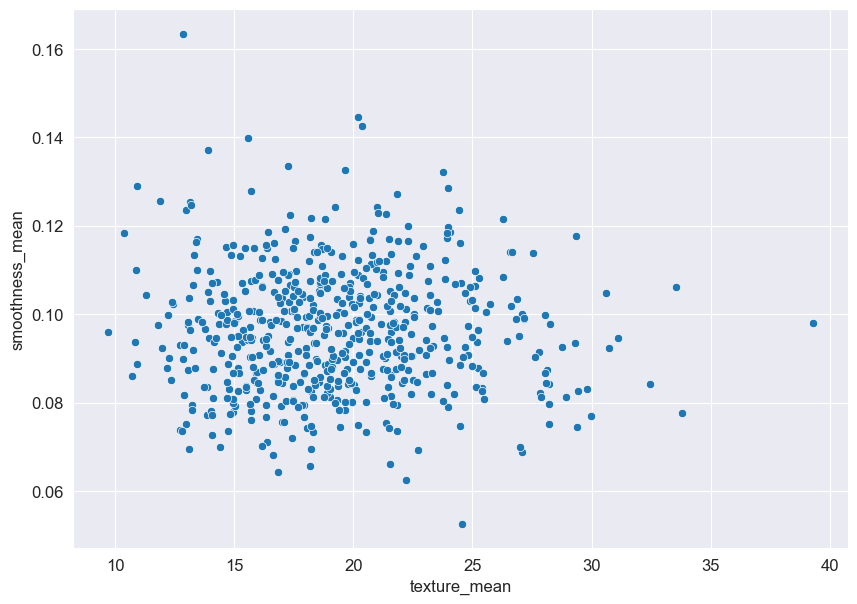

In [66]:
#scatterplot for texture_mean and smoothness_mean
sns.scatterplot(x=data_df['texture_mean'], y = data_df['smoothness_mean'])

<AxesSubplot:xlabel='perimeter_se', ylabel='compactness_se'>

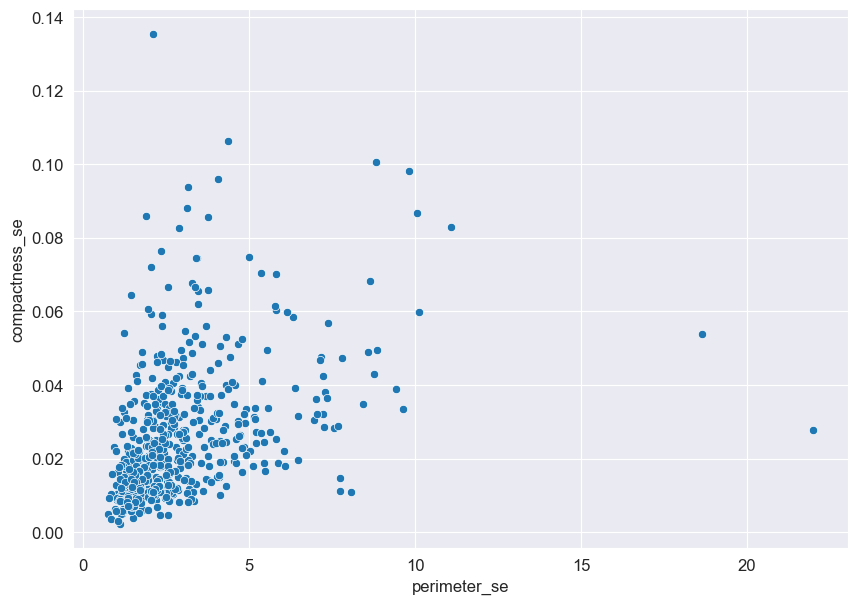

In [67]:
#scatterplot for perimeter_se and compactness_se
sns.scatterplot(x=data_df['perimeter_se'], y = data_df['compactness_se'])

<AxesSubplot:xlabel='area_worst', ylabel='fractal_dimension_worst'>

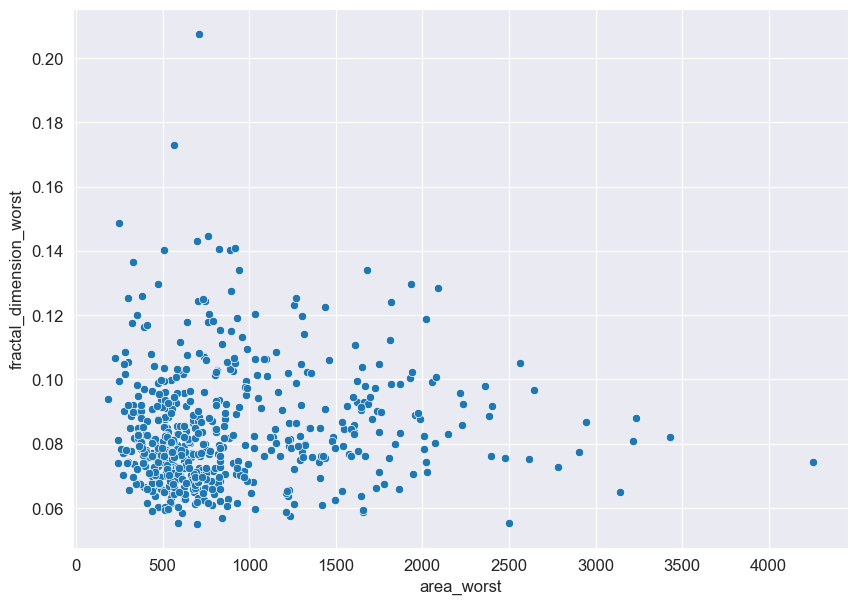

In [68]:
#scatterplot for area_worst and fractal_dimension_worst
sns.scatterplot(x=data_df['area_worst'], y = data_df['fractal_dimension_worst'])

In [69]:
#DATA PREPROCESSING 
#drop id column
data_df.drop('id', axis=1, inplace=True)

In [70]:
#Benign is class 0, and Malignant is class 1
diagnosis_mappings = {'B': 0, 'M': 1}

In [71]:
data_df['diagnosis'] = data_df['diagnosis'].map(diagnosis_mappings)

In [72]:
#looking for any missing value
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [73]:
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
#scaling the data using StandardScaler
X = data_df.drop('diagnosis', axis=1)
y = data_df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns)

In [75]:
X_scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [76]:
# split data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

In [77]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,-0.109996,-0.321053,-0.158542,-0.198772,-1.204139,-0.769070,-0.753164,-0.919018,-1.236277,-0.991984,...,-0.192419,-0.523905,-0.299980,-0.271919,-1.545592,-0.457162,-0.555498,-0.828574,-0.891002,-0.765061
124,-0.215082,-0.674768,-0.241747,-0.288361,-1.794101,-0.589220,-0.098925,-0.539588,-1.422476,-0.647506,...,-0.416068,-0.476680,-0.454866,-0.436812,-1.309316,-0.007411,0.281190,-0.378019,-1.379572,-0.424808
421,0.159817,-1.235591,0.257479,0.003444,0.479635,1.502076,0.705598,0.363201,1.001751,1.596561,...,0.039513,-1.194821,0.203699,-0.125485,-0.051226,0.694887,0.238492,-0.057956,-0.119321,0.450762
195,-0.345728,-0.688730,-0.388796,-0.393877,-1.206274,-0.960480,-0.628619,-0.648697,0.063458,-0.868652,...,-0.494759,-0.598813,-0.490013,-0.492186,-0.993698,-0.659455,-0.459548,-0.491153,0.199382,-0.801081
545,-0.144078,0.916946,-0.196849,-0.232332,-0.277565,-0.698760,-0.741488,-0.631673,-0.538947,-0.678694,...,-0.190348,0.555750,-0.288363,-0.265064,-0.472051,-0.652457,-0.802570,-0.652707,-0.418610,-0.798864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,-0.521016,0.329977,3.827870,...,-1.353531,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.016318,-1.046309,1.355149
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.362899,-0.038768,0.340564,...,-0.648001,0.583433,-0.647878,-0.630885,1.597003,0.074651,0.072498,0.109537,-0.153294,0.389251
270,0.046211,-0.574704,-0.068748,-0.063392,-2.282296,-1.470464,-1.023849,-1.100607,-1.108494,-1.281175,...,-0.281464,-0.818652,-0.381891,-0.344521,-2.047074,-1.297121,-1.120358,-1.237560,-0.716282,-1.260478
435,-0.041833,0.076875,-0.034972,-0.157532,0.686015,0.169787,0.298817,0.405245,-0.520693,0.374586,...,0.159621,0.834212,0.197742,-0.019835,1.268234,0.652266,0.646282,1.036837,0.450138,1.194443


In [78]:
#Logistic Regression 
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [79]:
log_pred = logmodel.predict(X_test)

In [80]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Training cross validation score: 0.9747435897435898
Testing accuracy score: 0.9824561403508771
Confusion Matrix:
True Negatives(TN) =  106
False Positives(FP) =  2
False Negatives(FN) =  1
True Positives(TP) =  62


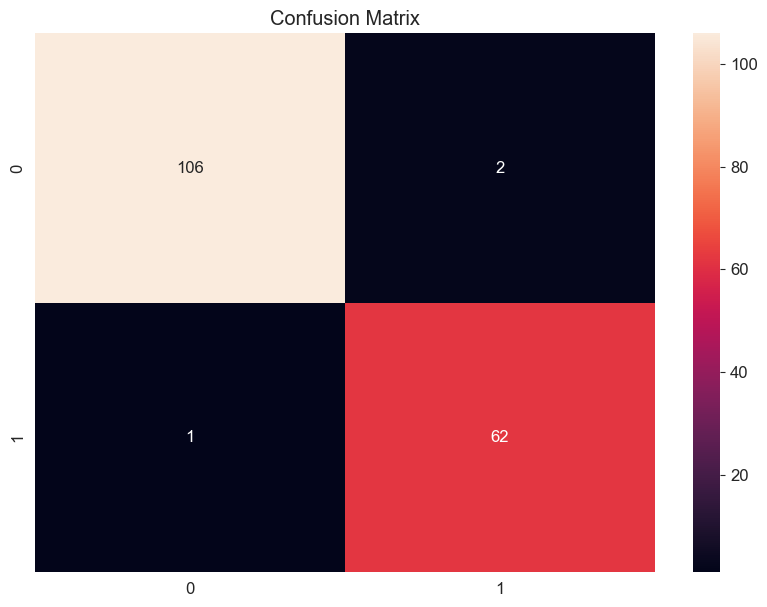

In [81]:
print("Training cross validation score:", cross_val_score(logmodel, X_train, y_train, cv=10).mean())
print("Testing accuracy score:", accuracy_score(y_test, log_pred))

cm = confusion_matrix(y_test, log_pred)
print('Confusion Matrix:')
print('True Negatives(TN) = ', cm[0,0])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
print('True Positives(TP) = ', cm[1,1])
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion Matrix')

plt.show()

In [82]:
#KNN
test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

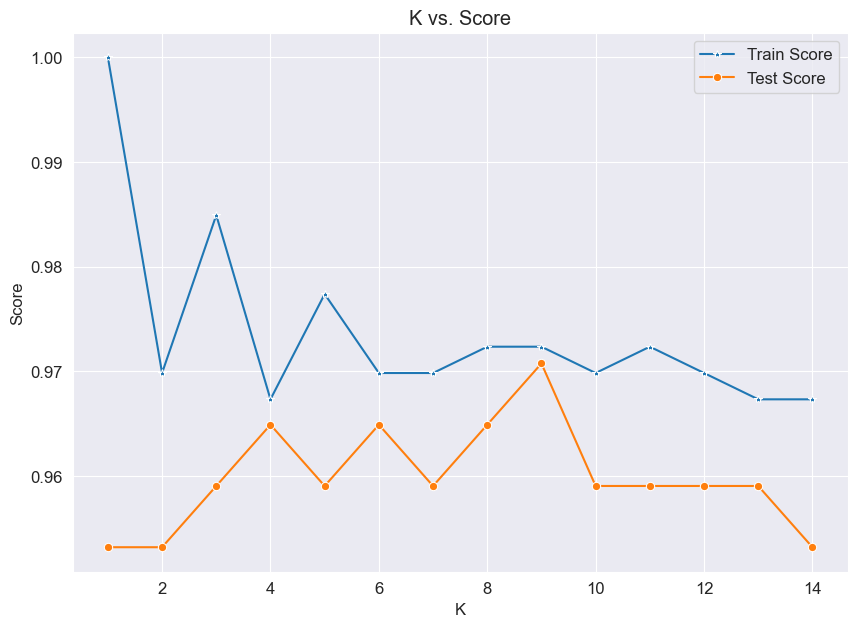

In [83]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [84]:
#Checking to see which K score is the best 
#Turns out the best K score is 9
max=0
index=0
for i in range(1,15):
    knn = KNeighborsClassifier(i)

    knn.fit(X_train,y_train)
    testing = knn.score(X_test,y_test)
    if testing > max:
        max = testing
        index = i
        
knn = KNeighborsClassifier(14)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9532163742690059

In [85]:
knn_pred = knn.predict(X_test)

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       108
           1       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



Training cross validation score: 0.9747435897435898
Testing accuracy score: 0.9532163742690059
Confusion Matrix:
True Negatives(TN) =  106
False Positives(FP) =  2
False Negatives(FN) =  6
True Positives(TP) =  57


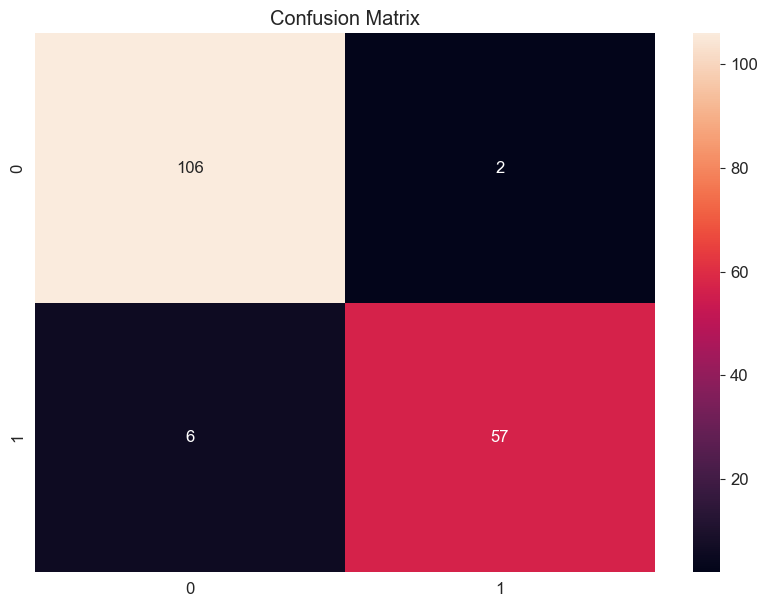

In [86]:
print("Training cross validation score:", cross_val_score(logmodel, X_train, y_train, cv=10).mean())
print("Testing accuracy score:", accuracy_score(y_test, knn_pred))

cm = confusion_matrix(y_test, knn_pred)
print('Confusion Matrix:')
print('True Negatives(TN) = ', cm[0,0])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
print('True Positives(TP) = ', cm[1,1])
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion Matrix')

plt.show()

In [87]:
#Decision Tree using the three parameters

from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [88]:
#predict the model
y_pred_dec_tree = dec_tree.predict(X_test)
print("Predicted values:")
print(y_pred_dec_tree)

Predicted values:
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [89]:
#calculate the accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_dec_tree)))

Model accuracy score with criterion gini index: 0.9649


In [90]:
#calculate the training and set score
y_pred_train_gini = dec_tree.predict(X_train)
print('Training set score: {:.4f}'.format(dec_tree.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dec_tree.score(X_test, y_test)))

Training set score: 0.9698
Test set score: 0.9649


In [91]:
#calssification report 
print(classification_report(y_test, y_pred_dec_tree))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Training cross validation score: 0.9221153846153847
Testing accuracy score: 0.9649122807017544
Confusion Matrix:
True Negatives(TN) =  105
False Positives(FP) =  3
False Negatives(FN) =  3
True Positives(TP) =  60


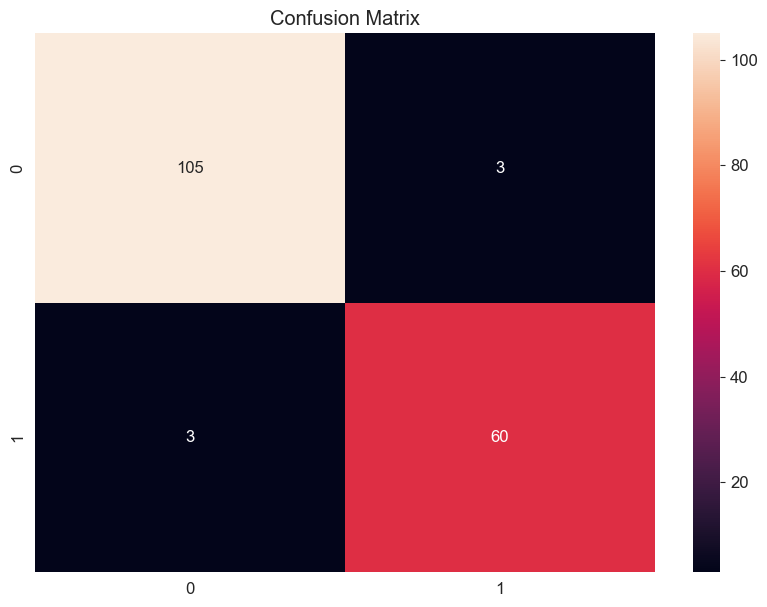

In [92]:
# calculate the cross validation score and confusion matrix 
print("Training cross validation score:", cross_val_score(dec_tree, X_train, y_train, cv=10).mean())
print("Testing accuracy score:", accuracy_score(y_test, y_pred_dec_tree))

cm = confusion_matrix(y_test, y_pred_dec_tree)
print('Confusion Matrix:')
print('True Negatives(TN) = ', cm[0,0])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])
print('True Positives(TP) = ', cm[1,1])
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion Matrix')

plt.show()

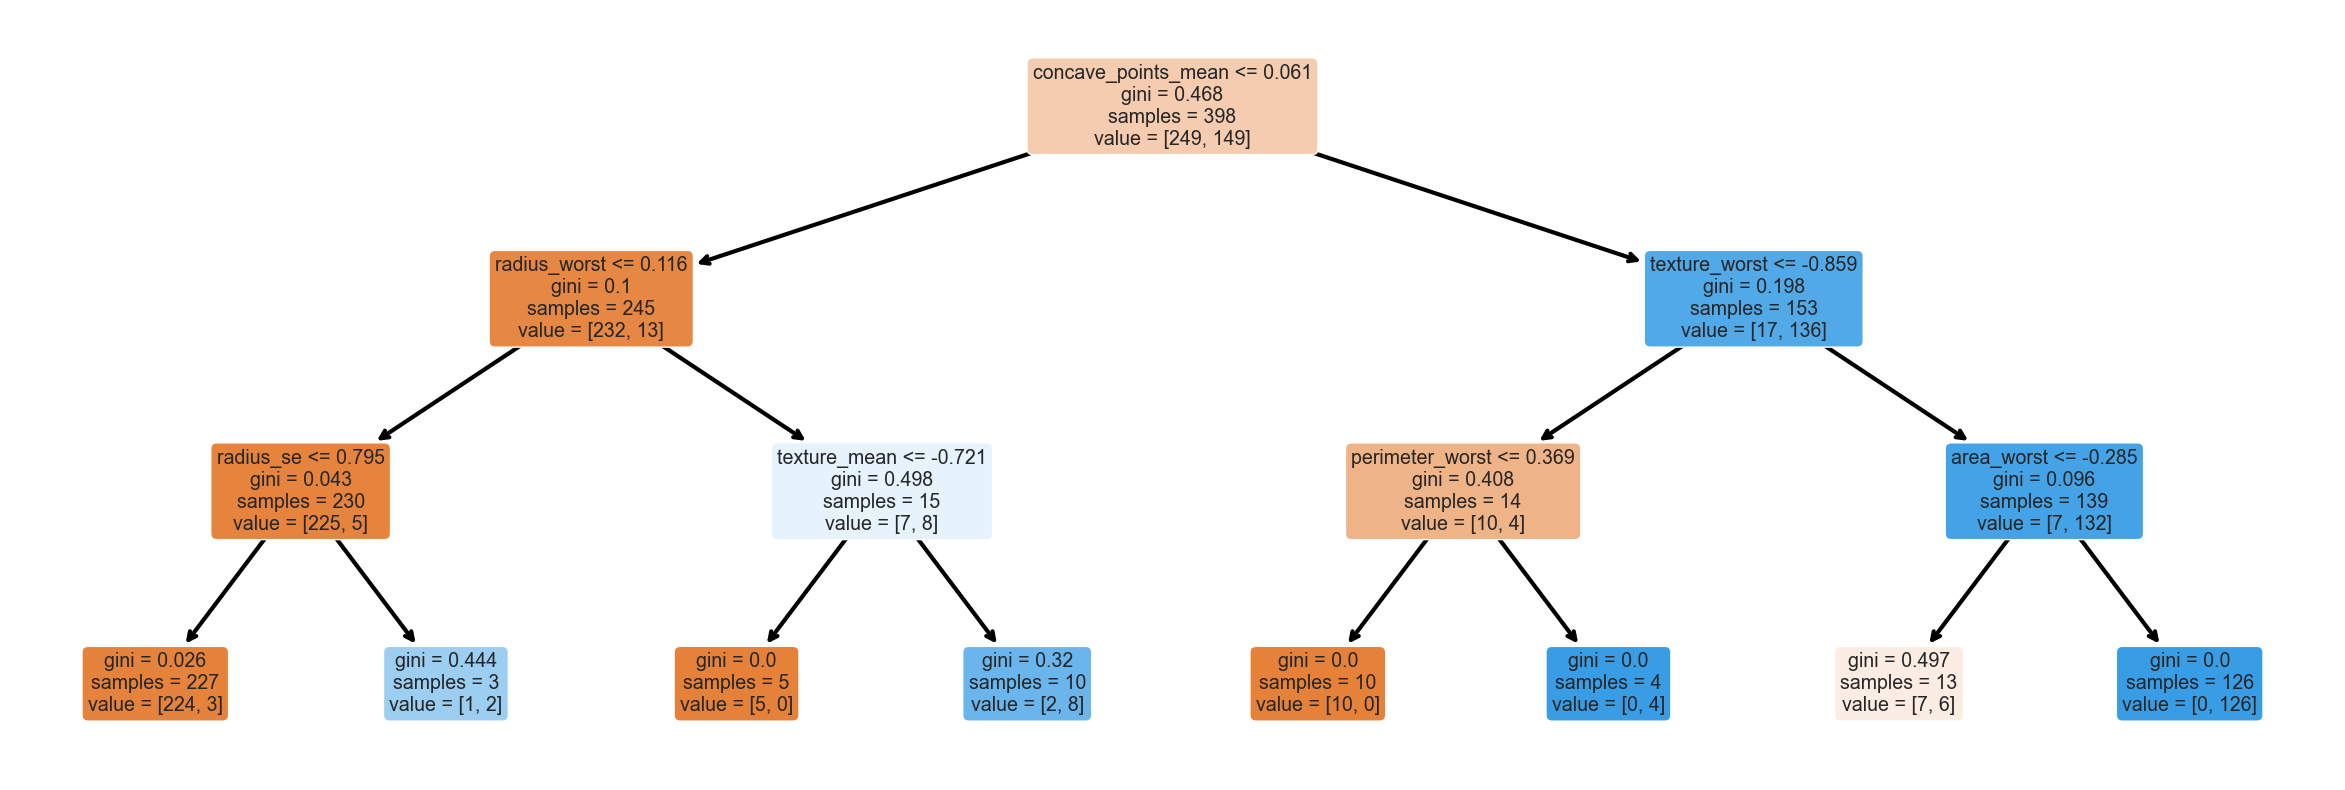

In [93]:
#visualize the decision tree
from sklearn import tree

fig, ax = plt.subplots(figsize=(30,10))
out = tree.plot_tree(dec_tree, filled=True, rounded=True,
                     feature_names= ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean','compactness_mean', 'concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
                                     'radius_se', 'texture_se', 'perimeter_se','area_se','smoothness_se','compactness_se', 'concavity_se','concave_points_se','symmetry_mean','fractal_dimension_se',
                                     'radius_worst', 'texture_worst', 'perimeter_worst','area_worst','smoothness_worst','compactness_worst', 'concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst',
                                    ])

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)